# 1. Importing Datasets/Libraries

In [1]:
#Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns
import numpy as np
#sns.set_style('darkgrid')
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, ElasticNetCV
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, GridSearchCV
from sklearn.preprocessing import PolynomialFeatures, PowerTransformer, StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score, mean_squared_error

In [2]:
#change wd
import os
os.chdir("C:/Users/annitan/Desktop/GA/DSIF-SG-7 - Copy/Project_2/datasets")

In [3]:
#importing datasets
#import train
train = pd.read_csv('train.csv')

#import test
test = pd.read_csv('test.csv')

#Change columns names to lowercase
train.columns = train.columns.str.lower().str.replace(' ', '_')
test.columns = test.columns.str.lower().str.replace(' ', '_')

# 2. Cleaning of data

## 2.1 Understanding Columns

In [4]:
# Check the shape of 2 data sets
print(f'shape of train set: {train.shape}')
print(f'shape of test set: {test.shape}')

shape of train set: (2051, 81)
shape of test set: (878, 80)


In [5]:
#Check if columns are the same in train and test (except 'SalePrice')
train_col_list = [x for x in train.columns]
train_col_list.remove('saleprice')
train_col_list == test.columns
#The column that is not in test set is 'SalePrice'
#All the rest of all columns are the same

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True])

In [6]:
# Check datatypes and numbers of non-null values; for train
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               2051 non-null   int64  
 1   pid              2051 non-null   int64  
 2   ms_subclass      2051 non-null   int64  
 3   ms_zoning        2051 non-null   object 
 4   lot_frontage     1721 non-null   float64
 5   lot_area         2051 non-null   int64  
 6   street           2051 non-null   object 
 7   alley            140 non-null    object 
 8   lot_shape        2051 non-null   object 
 9   land_contour     2051 non-null   object 
 10  utilities        2051 non-null   object 
 11  lot_config       2051 non-null   object 
 12  land_slope       2051 non-null   object 
 13  neighborhood     2051 non-null   object 
 14  condition_1      2051 non-null   object 
 15  condition_2      2051 non-null   object 
 16  bldg_type        2051 non-null   object 
 17  house_style   

In [7]:
#Changing columns to string/category - Id, Pid, MS Subclass
train["id"]=train["id"].astype("str")
train["pid"]=train["pid"].astype("str")
train["ms_subclass"]=train["ms_subclass"].astype('str')

In [8]:
# Check datatypes and numbers of non-null values; for train
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               2051 non-null   object 
 1   pid              2051 non-null   object 
 2   ms_subclass      2051 non-null   object 
 3   ms_zoning        2051 non-null   object 
 4   lot_frontage     1721 non-null   float64
 5   lot_area         2051 non-null   int64  
 6   street           2051 non-null   object 
 7   alley            140 non-null    object 
 8   lot_shape        2051 non-null   object 
 9   land_contour     2051 non-null   object 
 10  utilities        2051 non-null   object 
 11  lot_config       2051 non-null   object 
 12  land_slope       2051 non-null   object 
 13  neighborhood     2051 non-null   object 
 14  condition_1      2051 non-null   object 
 15  condition_2      2051 non-null   object 
 16  bldg_type        2051 non-null   object 
 17  house_style   

In [9]:
#Changing columns to string/category - Id, Pid, MS Subclass
test["id"]=train["id"].astype("str")
test["pid"]=train["pid"].astype("str")
test["ms_subclass"]=train["ms_subclass"].astype('str')

In [10]:
# Check datatypes and numbers of non-null values; for test
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878 entries, 0 to 877
Data columns (total 80 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               878 non-null    object 
 1   pid              878 non-null    object 
 2   ms_subclass      878 non-null    object 
 3   ms_zoning        878 non-null    object 
 4   lot_frontage     718 non-null    float64
 5   lot_area         878 non-null    int64  
 6   street           878 non-null    object 
 7   alley            58 non-null     object 
 8   lot_shape        878 non-null    object 
 9   land_contour     878 non-null    object 
 10  utilities        878 non-null    object 
 11  lot_config       878 non-null    object 
 12  land_slope       878 non-null    object 
 13  neighborhood     878 non-null    object 
 14  condition_1      878 non-null    object 
 15  condition_2      878 non-null    object 
 16  bldg_type        878 non-null    object 
 17  house_style     

## 2.2 Null Values

### 2.2.1 Checking which columns has Null Values

In [11]:
#Check for null, sorted; train data set
train.isnull().sum().sort_values(ascending=False)

pool_qc            2042
misc_feature       1986
alley              1911
fence              1651
fireplace_qu       1000
lot_frontage        330
garage_finish       114
garage_qual         114
garage_yr_blt       114
garage_cond         114
garage_type         113
bsmt_exposure        58
bsmtfin_type_2       56
bsmtfin_type_1       55
bsmt_cond            55
bsmt_qual            55
mas_vnr_area         22
mas_vnr_type         22
bsmt_half_bath        2
bsmt_full_bath        2
garage_area           1
total_bsmt_sf         1
bsmt_unf_sf           1
bsmtfin_sf_2          1
bsmtfin_sf_1          1
garage_cars           1
mo_sold               0
sale_type             0
full_bath             0
half_bath             0
bedroom_abvgr         0
kitchen_abvgr         0
kitchen_qual          0
yr_sold               0
misc_val              0
pool_area             0
screen_porch          0
totrms_abvgrd         0
functional            0
fireplaces            0
3ssn_porch            0
enclosed_porch  

In [12]:
train.shape

(2051, 81)

In [13]:
#Drop columns with >= 1000 missing data (almost 50%)
train.drop(columns=['pool_qc','misc_feature','alley','fence','fireplace_qu'],axis = 1, inplace=True)
#Check the new shape for train
train.shape

(2051, 76)

In [14]:
#Drop 'pid' as it is similar to 'id'
train.drop(columns=['pid'],axis = 1, inplace=True)
#Check the new shape for train
train.shape

(2051, 75)

In [15]:
#Check for null, sorted; test data set
test.isnull().sum().sort_values(ascending=False)

pool_qc            874
misc_feature       837
alley              820
fence              706
fireplace_qu       422
lot_frontage       160
garage_yr_blt       45
garage_finish       45
garage_qual         45
garage_cond         45
garage_type         44
bsmtfin_type_1      25
bsmt_qual           25
bsmt_cond           25
bsmt_exposure       25
bsmtfin_type_2      25
electrical           1
mas_vnr_type         1
mas_vnr_area         1
kitchen_abvgr        0
totrms_abvgrd        0
bedroom_abvgr        0
half_bath            0
full_bath            0
bsmt_half_bath       0
bsmt_full_bath       0
gr_liv_area          0
kitchen_qual         0
id                   0
functional           0
fireplaces           0
2nd_flr_sf           0
garage_cars          0
garage_area          0
paved_drive          0
wood_deck_sf         0
open_porch_sf        0
enclosed_porch       0
3ssn_porch           0
screen_porch         0
pool_area            0
misc_val             0
mo_sold              0
yr_sold    

In [16]:
test.shape

(878, 80)

In [17]:
#The top 5 columns with missing data are the same as train. Hence, drop the same columns. 
#We would also need to drop the same columns for consistency between both data sets.
test.drop(columns=['pool_qc','misc_feature','alley','fence','fireplace_qu'],axis = 1, inplace=True)
#'pid' as dropped too
test.drop(columns=['pid'],axis = 1, inplace=True)

#Check the new shape for test
test.shape

(878, 74)

In [18]:
#Look at the shape between train and test
train.shape, test.shape

((2051, 75), (878, 74))

### 2.2.2 Clean up column 'lot_fontage'

In [19]:
#LotFrontage: Linear feet of street connected to property
#print(f'Number of missing values in lot_fontage {train['lot_frontage'].isna().sum()}')
rows = train.shape[0]
print(f'Number of missing values in lot_fontage: {train.lot_frontage.isna().sum()}')
print(f'% of missing values in lot_fontage: {round(train.lot_frontage.isna().sum()/rows*100,1)}%')

Number of missing values in lot_fontage: 330
% of missing values in lot_fontage: 16.1%


In [20]:
#Look at the value counts
train['lot_frontage'].value_counts()

60.0     179
70.0      96
80.0      94
50.0      90
65.0      71
75.0      68
85.0      52
63.0      38
24.0      33
78.0      33
21.0      32
64.0      31
90.0      31
74.0      31
72.0      30
68.0      28
62.0      28
73.0      25
100.0     23
82.0      21
43.0      20
57.0      20
52.0      20
66.0      19
79.0      19
67.0      18
59.0      18
53.0      18
76.0      16
88.0      16
51.0      16
56.0      15
69.0      14
84.0      14
55.0      14
81.0      14
40.0      13
35.0      13
92.0      13
91.0      13
58.0      13
71.0      13
44.0      12
30.0      11
48.0      11
41.0      11
77.0      11
95.0      11
34.0      11
96.0      11
83.0      10
61.0      10
105.0      9
107.0      9
93.0       9
110.0      9
94.0       8
45.0       8
42.0       8
87.0       8
120.0      8
98.0       7
102.0      7
86.0       7
37.0       6
89.0       6
54.0       6
47.0       6
32.0       6
103.0      5
36.0       5
97.0       4
38.0       4
129.0      4
109.0      4
114.0      4
39.0       4

In [21]:
#Understand the data in the column
train['lot_frontage'].describe()

count    1721.000000
mean       69.055200
std        23.260653
min        21.000000
25%        58.000000
50%        68.000000
75%        80.000000
max       313.000000
Name: lot_frontage, dtype: float64

In [22]:
# Group lots by lots configuration; find the mean of their lot_frontage
grouped_lots = train.groupby(['lot_config']).agg({'lot_frontage' : 'mean'})
grouped_lots
#Might be meaningful to replace missing values with mean based on their lot_config

,lot_frontage
lot_config,
Corner,83.245552
CulDSac,55.228571
FR2,60.836735
FR3,87.000000
Inside,66.952780


In [23]:
#replace np.nan with average for lot_config of that type
train.loc[(train['lot_frontage'].isna()) & (train['lot_config'] == 'Corner'), 'lot_frontage'] = 83.25
train.loc[(train['lot_frontage'].isna()) & (train['lot_config'] == 'CulDSac'), 'lot_frontage'] = 54.734375        
train.loc[(train['lot_frontage'].isna()) & (train['lot_config'] == 'FR2'), 'lot_frontage'] = 60.836735        
train.loc[(train['lot_frontage'].isna()) & (train['lot_config'] == 'FR3'), 'lot_frontage'] = 87.000000        
train.loc[(train['lot_frontage'].isna()) & (train['lot_config'] == 'Inside'), 'lot_frontage'] = 66.759571

In [24]:
#Check if there are anymore missing values
train['lot_frontage'].isna().sum()

0

### 2.2.3 Clean up columns related to garage - 'garage_finish', 'garage_qual', 'garage_yr_blt, 'garage_cond', 'garage_type'

GarageFinish: Interior finish of the garage

GarageYrBlt: Year garage was built

GarageCond: Garage condition

GarageCond: Garage condition

GarageType: Garage location

For all the columns above, if data is missing, we would assume that data should be NA (which essentially means no Garage). 
This is especially true when in all the columns, there are no data recorded as NA. 
This suggest that data might be left blank when there is no garage.

In [25]:
print(f'Number of missing values in garage_finish: {train.garage_finish.isna().sum()}')
print(f'% of missing values in garage_finish: {round(train.garage_finish.isna().sum()/rows*100,1)}%')

Number of missing values in garage_finish: 114
% of missing values in garage_finish: 5.6%


In [26]:
#Check the value counts
train['garage_finish'].value_counts()
#No data recorded as NA. Hence, we would assome that Missing values might be no garbage (NA No Garage)

Unf    849
RFn    579
Fin    509
Name: garage_finish, dtype: int64

In [27]:
#replace np.nan with NA
train.loc[(train['garage_finish'].isna()), 'garage_finish'] = 'NA'
#Check the value counts again
train['garage_finish'].value_counts()
#All 114 missing data replaced as NA

Unf    849
RFn    579
Fin    509
NA     114
Name: garage_finish, dtype: int64

In [28]:
print(f'Number of missing values in garage_qual: {train.garage_qual.isna().sum()}')
print(f'% of missing values in garage_qual: {round(train.garage_qual.isna().sum()/rows*100,1)}%')

Number of missing values in garage_qual: 114
% of missing values in garage_qual: 5.6%


In [29]:
#Check the value counts
train['garage_qual'].value_counts()
#No data recorded as NA. Hence, we would assome that Missing values might be no garbage (NA No Garage)

TA    1832
Fa      82
Gd      18
Ex       3
Po       2
Name: garage_qual, dtype: int64

In [30]:
#replace np.nan with NA
train.loc[(train['garage_qual'].isna()), 'garage_qual'] = 'NA'
#Check the value counts again
train['garage_qual'].value_counts()
#All 114 missing data replaced as NA

TA    1832
NA     114
Fa      82
Gd      18
Ex       3
Po       2
Name: garage_qual, dtype: int64

In [31]:
print(f'Number of missing values in garage_yr_blt: {train.garage_yr_blt.isna().sum()}')
print(f'% of missing values in garage_yr_blt: {round(train.garage_yr_blt.isna().sum()/rows*100,1)}%')

Number of missing values in garage_yr_blt: 114
% of missing values in garage_yr_blt: 5.6%


In [32]:
train['garage_yr_blt'].dtype

dtype('float64')

In [33]:
#Have to remove NA first, before we can remove the decimal points
train.loc[(train['garage_yr_blt'].isna()), 'garage_yr_blt'] = 0.0

In [34]:
train.loc[(train['garage_yr_blt'].isna())]

,id,ms_subclass,ms_zoning,lot_frontage,lot_area,street,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold,sale_type,saleprice


In [35]:
#Remove decimal places for year
train['garage_yr_blt'] = train['garage_yr_blt'].astype(int)

In [36]:
train['garage_yr_blt'].dtype

dtype('int32')

In [37]:
#Check the value counts
train['garage_yr_blt'].value_counts()
#No data recorded as NA. Hence, we would assome that Missing values might be no garbage (NA No Garage)

0       114
2005    105
2007     84
2006     80
2004     72
2003     66
1977     46
1998     45
2008     44
2000     41
2002     40
1999     39
1976     35
1993     34
1978     33
1968     32
1950     32
1958     32
1996     31
1956     31
1966     29
2001     27
1965     27
1967     26
1995     26
1997     26
1975     25
1964     25
1994     25
1962     25
1979     25
1954     25
1959     23
1992     22
1980     22
1963     22
1960     21
1920     21
1990     21
1940     20
1957     20
1930     20
1970     20
1973     20
1961     20
1953     19
1974     19
1969     18
1971     18
2009     17
1972     17
1939     16
1987     16
1955     15
1948     14
1988     14
1989     12
1985     12
1951     12
1981     11
1984     11
1991     10
1949     10
1945     10
1941     10
1986     10
1952     10
1926      8
1935      7
1936      7
1983      7
1938      6
1925      6
1982      6
1928      6
1922      6
1942      6
1910      5
1946      5
1916      5
1923      5
1927      4
1921      4
1924

In [38]:
#Now, we can replace 0 with NA
train.loc[(train['garage_yr_blt'] == 0), 'garage_yr_blt'] = 'NA'
train['garage_yr_blt'].value_counts()
#All 114 missing data replaced as NA

NA      114
2005    105
2007     84
2006     80
2004     72
2003     66
1977     46
1998     45
2008     44
2000     41
2002     40
1999     39
1976     35
1993     34
1978     33
1950     32
1958     32
1968     32
1996     31
1956     31
1966     29
1965     27
2001     27
1995     26
1997     26
1967     26
1962     25
1964     25
1954     25
1975     25
1979     25
1994     25
1959     23
1963     22
1980     22
1992     22
1990     21
1960     21
1920     21
1973     20
1930     20
1940     20
1961     20
1957     20
1970     20
1953     19
1974     19
1969     18
1971     18
1972     17
2009     17
1987     16
1939     16
1955     15
1988     14
1948     14
1989     12
1951     12
1985     12
1981     11
1984     11
1991     10
1941     10
1945     10
1952     10
1986     10
1949     10
1926      8
1936      7
1935      7
1983      7
1928      6
1925      6
1922      6
1942      6
1938      6
1982      6
1946      5
1910      5
1916      5
1923      5
1921      4
1924      4
1927

In [39]:
print(f'Number of missing values in garage_cond: {train.garage_cond.isna().sum()}')
print(f'% of missing values in garage_cond: {round(train.garage_cond.isna().sum()/rows*100,1)}%')

Number of missing values in garage_cond: 114
% of missing values in garage_cond: 5.6%


In [40]:
train['garage_cond'].value_counts()
#GarageCond: Garage condition

TA    1868
Fa      47
Gd      12
Po       8
Ex       2
Name: garage_cond, dtype: int64

In [41]:
train.loc[(train['garage_cond'].isna()), 'garage_cond'] = 'NA'

In [42]:
train['garage_cond'].isna().sum()

0

In [43]:
print(f'Number of missing values in garage_type: {train.garage_type.isna().sum()}')
print(f'% of missing values in garage_type: {round(train.garage_type.isna().sum()/rows*100,1)}%')

Number of missing values in garage_type: 113
% of missing values in garage_type: 5.5%


In [44]:
#Check the value counts
train['garage_type'].value_counts()
#No data recorded as NA. Hence, we would assome that Missing values might be no garbage (NA No Garage)

Attchd     1213
Detchd      536
BuiltIn     132
Basment      27
2Types       19
CarPort      11
Name: garage_type, dtype: int64

In [45]:
#replace np.nan with NA
train.loc[(train['garage_type'].isna()), 'garage_type'] = 'NA'
#Check value counts again
train['garage_type'].value_counts()
#Note that missing data only has 113 - and all changed to NA. 
#It suggests that there is one row of data with garage columns being NA, yet garage type is not NA.

Attchd     1213
Detchd      536
BuiltIn     132
NA          113
Basment      27
2Types       19
CarPort      11
Name: garage_type, dtype: int64

In [46]:
#Which is the row with garage type but everything else NA?
train[(train['garage_yr_blt'] == 'NA') & (train['garage_type'] !='NA')]

,id,ms_subclass,ms_zoning,lot_frontage,lot_area,street,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold,sale_type,saleprice
1712,2237,70,RM,50.0,9060,Pave,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,2Story,5,6,1923,1999,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,BrkTil,Gd,TA,No,ALQ,548.0,Unf,0.0,311.0,859.0,GasA,Ex,Y,SBrkr,942,886,0,1828,0.0,0.0,2,0,3,1,Gd,6,Typ,0,Detchd,NA,NA,NaN,NaN,NA,NA,Y,174,0,212,0,0,0,0,3,2007,WD,150909


In [47]:
#Might be a data error. Hence, should change garage_type to NA
train.loc[(train['garage_yr_blt'] == 'NA') & (train['garage_type'] !='NA'), 'garage_type'] = 'NA'
#Check if data has been replaced
train[(train['garage_yr_blt'] == 'NA') & (train['garage_type'] !='NA')]

,id,ms_subclass,ms_zoning,lot_frontage,lot_area,street,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold,sale_type,saleprice


### 2.2.4 Clean up columns related to basement - 'bsmt_exposure', 'bsmtfin_type_2', 'bsmtfin_type_1, 'bsmt_cond', 'bsmt_qual'

Bsmt Exposure: Refers to walkout or garden level walls

BsmtFinType2: Quality of second finished area (if present)

BsmtFinType1: Quality of basement finished area

BsmtCond: General condition of the basement            

BsmtQual: Height of the basement

For all the columns above, if data is missing, we would assume that data should be NA (which essentially means no basement). 
This is especially true when in all the columns, there are no data recorded as NA. 
This suggest that data might be left blank when there is no basement.

In [48]:
print(f'Number of missing values in bsmt_exposure: {train.bsmt_exposure.isna().sum()}')
print(f'% of missing values in bsmt_exposure: {round(train.bsmt_exposure.isna().sum()/rows*100,1)}%')

Number of missing values in bsmt_exposure: 58
% of missing values in bsmt_exposure: 2.8%


In [49]:
#Check the value counts
train['bsmt_exposure'].value_counts()
#No data recorded as NA. Hence, we would assome that Missing values might be no basement (NA No Basement)

No    1339
Av     288
Gd     203
Mn     163
Name: bsmt_exposure, dtype: int64

In [50]:
#replace np.nan with NA
train.loc[(train['bsmt_exposure'].isna()), 'bsmt_exposure'] = 'NA'
#Check the value counts again
train['bsmt_exposure'].value_counts()
#58 missing values replaced as NA

No    1339
Av     288
Gd     203
Mn     163
NA      58
Name: bsmt_exposure, dtype: int64

In [51]:
print(f'Number of missing values in bsmtfin_type_2: {train.bsmtfin_type_2.isna().sum()}')
print(f'% of missing values in bsmtfin_type_2: {round(train.bsmtfin_type_2.isna().sum()/rows*100,1)}%')

Number of missing values in bsmtfin_type_2: 56
% of missing values in bsmtfin_type_2: 2.7%


In [52]:
#Check the value counts
train['bsmtfin_type_2'].value_counts()
#No data recorded as NA. Hence, we would assome that Missing values might be no basement (NA No Basement)

Unf    1749
Rec      80
LwQ      60
BLQ      48
ALQ      35
GLQ      23
Name: bsmtfin_type_2, dtype: int64

In [53]:
#replace np.nan with NA
train.loc[(train['bsmtfin_type_2'].isna()), 'bsmtfin_type_2'] = 'NA'
#Check the value counts again
train['bsmtfin_type_2'].value_counts()
#56 missing values replaced as NA
#Note that missing data only has 56 - and all changed to NA. 
#It suggests that there are 2 rows of data with bsmt_exposure being NA, yet bsmtfin_type_2 is not NA.

Unf    1749
Rec      80
LwQ      60
NA       56
BLQ      48
ALQ      35
GLQ      23
Name: bsmtfin_type_2, dtype: int64

In [54]:
#Which are the rows with bsmt_exposure = NA but bsmtfin_type_2 is not NA?
train[(train['bsmtfin_type_2'] != 'NA') & (train['bsmt_exposure'] =='NA')]

,id,ms_subclass,ms_zoning,lot_frontage,lot_area,street,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold,sale_type,saleprice
1456,1797,60,FV,81.0,10411,Pave,Reg,Lvl,AllPub,Corner,Gtl,Somerst,Norm,Norm,1Fam,2Story,5,5,2007,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,CBlock,Gd,TA,NA,Unf,0.0,Unf,0.0,725.0,725.0,GasA,Ex,Y,SBrkr,725,863,0,1588,0.0,0.0,3,0,3,1,Gd,8,Typ,0,Attchd,2007,Unf,2.0,561.0,TA,TA,Y,0,0,0,0,0,0,0,7,2007,New,212109
1547,67,20,RL,73.0,8987,Pave,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2005,2006,Gable,CompShg,VinylSd,VinylSd,BrkFace,226.0,Gd,TA,PConc,Gd,TA,NA,Unf,0.0,Unf,0.0,1595.0,1595.0,GasA,Ex,Y,SBrkr,1595,0,0,1595,0.0,0.0,2,0,2,1,Gd,6,Typ,1,Attchd,2005,RFn,3.0,880.0,TA,TA,Y,144,0,0,0,0,0,0,5,2010,WD,221500
1997,2780,60,RL,65.0,14006,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2002,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,144.0,Gd,TA,PConc,Gd,TA,NA,Unf,0.0,Unf,0.0,936.0,936.0,GasA,Ex,Y,SBrkr,936,840,0,1776,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Attchd,2002,RFn,2.0,474.0,TA,TA,Y,144,96,0,0,0,0,0,2,2006,WD,192500


In [55]:
#Might be error, so change bsmt_exposure to NA
#Change this code to the one with OR
train.loc[(train['bsmtfin_type_2'] != 'NA') & (train['bsmt_exposure'] =='NA'), 'bsmtfin_type_2'] = 'NA'

In [56]:
#Check
train[(train['bsmtfin_type_2'] != 'NA') & (train['bsmt_exposure'] =='NA')]

,id,ms_subclass,ms_zoning,lot_frontage,lot_area,street,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold,sale_type,saleprice


In [57]:
print(f'Number of missing values in bsmtfin_type_1: {train.bsmtfin_type_1.isna().sum()}')
print(f'% of missing values in bsmtfin_type_1: {round(train.bsmtfin_type_1.isna().sum()/rows*100,1)}%')

Number of missing values in bsmtfin_type_1: 55
% of missing values in bsmtfin_type_1: 2.7%


In [58]:
train['bsmtfin_type_1'].value_counts()
#No data recorded as NA. Hence, we would assome that Missing values might be no basement (NA No Basement)

GLQ    615
Unf    603
ALQ    293
BLQ    200
Rec    183
LwQ    102
Name: bsmtfin_type_1, dtype: int64

In [59]:
train.loc[(train['bsmtfin_type_1'].isna()), 'bsmtfin_type_1'] = 'NA'
train['bsmtfin_type_1'].value_counts()

GLQ    615
Unf    603
ALQ    293
BLQ    200
Rec    183
LwQ    102
NA      55
Name: bsmtfin_type_1, dtype: int64

In [60]:
#55 missing values replaced as NA
#Note that missing data only has 55 - and all changed to NA. 
#It suggests that there are 3 rows of data with bsmt_exposure being NA, yet bsmtfin_type_2 is not NA.

In [61]:
#Which are the rows with bsmt_exposure = NA but bsmtfin_type_2 is not NA?
train[(train['bsmtfin_type_1'] != 'NA') & (train['bsmt_exposure'] =='NA')]

,id,ms_subclass,ms_zoning,lot_frontage,lot_area,street,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold,sale_type,saleprice
1456,1797,60,FV,81.0,10411,Pave,Reg,Lvl,AllPub,Corner,Gtl,Somerst,Norm,Norm,1Fam,2Story,5,5,2007,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,CBlock,Gd,TA,NA,Unf,0.0,NA,0.0,725.0,725.0,GasA,Ex,Y,SBrkr,725,863,0,1588,0.0,0.0,3,0,3,1,Gd,8,Typ,0,Attchd,2007,Unf,2.0,561.0,TA,TA,Y,0,0,0,0,0,0,0,7,2007,New,212109
1547,67,20,RL,73.0,8987,Pave,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2005,2006,Gable,CompShg,VinylSd,VinylSd,BrkFace,226.0,Gd,TA,PConc,Gd,TA,NA,Unf,0.0,NA,0.0,1595.0,1595.0,GasA,Ex,Y,SBrkr,1595,0,0,1595,0.0,0.0,2,0,2,1,Gd,6,Typ,1,Attchd,2005,RFn,3.0,880.0,TA,TA,Y,144,0,0,0,0,0,0,5,2010,WD,221500
1997,2780,60,RL,65.0,14006,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2002,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,144.0,Gd,TA,PConc,Gd,TA,NA,Unf,0.0,NA,0.0,936.0,936.0,GasA,Ex,Y,SBrkr,936,840,0,1776,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Attchd,2002,RFn,2.0,474.0,TA,TA,Y,144,96,0,0,0,0,0,2,2006,WD,192500


In [62]:
#Might be error, so change bsmt_exposure to NA
#Change this code to the one with OR
train.loc[(train['bsmtfin_type_1'] != 'NA') & (train['bsmt_exposure'] =='NA'), 'bsmtfin_type_1'] = 'NA'

In [63]:
#Check
train['bsmtfin_type_1'].value_counts()

GLQ    615
Unf    600
ALQ    293
BLQ    200
Rec    183
LwQ    102
NA      58
Name: bsmtfin_type_1, dtype: int64

In [64]:
print(f'Number of missing values in bsmt_cond: {train.bsmt_cond.isna().sum()}')
print(f'% of missing values in bsmt_cond: {round(train.bsmt_cond.isna().sum()/rows*100,1)}%')

Number of missing values in bsmt_cond: 55
% of missing values in bsmt_cond: 2.7%


In [65]:
train['bsmt_cond'].value_counts()
#BsmtCond: General condition of the basement            

TA    1834
Gd      89
Fa      65
Po       5
Ex       3
Name: bsmt_cond, dtype: int64

In [66]:
train.loc[(train['bsmt_cond'].isna()), 'bsmt_cond'] = 'NA'
train['bsmt_cond'].value_counts()

TA    1834
Gd      89
Fa      65
NA      55
Po       5
Ex       3
Name: bsmt_cond, dtype: int64

In [67]:
#55 missing values replaced as NA
#Note that missing data only has 55 - and all changed to NA. 
#It suggests that there are 3 rows of data with bsmt_exposure being NA, yet bsmtfin_type_2 is not NA.

In [68]:
#Which are the rows with bsmt_exposure = NA but bsmtfin_type_2 is not NA?
train[(train['bsmt_cond'] != 'NA') & (train['bsmt_exposure'] =='NA')]

,id,ms_subclass,ms_zoning,lot_frontage,lot_area,street,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold,sale_type,saleprice
1456,1797,60,FV,81.0,10411,Pave,Reg,Lvl,AllPub,Corner,Gtl,Somerst,Norm,Norm,1Fam,2Story,5,5,2007,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,CBlock,Gd,TA,NA,NA,0.0,NA,0.0,725.0,725.0,GasA,Ex,Y,SBrkr,725,863,0,1588,0.0,0.0,3,0,3,1,Gd,8,Typ,0,Attchd,2007,Unf,2.0,561.0,TA,TA,Y,0,0,0,0,0,0,0,7,2007,New,212109
1547,67,20,RL,73.0,8987,Pave,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2005,2006,Gable,CompShg,VinylSd,VinylSd,BrkFace,226.0,Gd,TA,PConc,Gd,TA,NA,NA,0.0,NA,0.0,1595.0,1595.0,GasA,Ex,Y,SBrkr,1595,0,0,1595,0.0,0.0,2,0,2,1,Gd,6,Typ,1,Attchd,2005,RFn,3.0,880.0,TA,TA,Y,144,0,0,0,0,0,0,5,2010,WD,221500
1997,2780,60,RL,65.0,14006,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2002,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,144.0,Gd,TA,PConc,Gd,TA,NA,NA,0.0,NA,0.0,936.0,936.0,GasA,Ex,Y,SBrkr,936,840,0,1776,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Attchd,2002,RFn,2.0,474.0,TA,TA,Y,144,96,0,0,0,0,0,2,2006,WD,192500


In [69]:
#Might be error, so change bsmt_exposure to NA
#Change this code to the one with OR
train.loc[(train['bsmt_cond'] != 'NA') & (train['bsmt_exposure'] =='NA'), 'bsmt_cond'] = 'NA'

In [70]:
#Check
train['bsmt_cond'].value_counts()

TA    1831
Gd      89
Fa      65
NA      58
Po       5
Ex       3
Name: bsmt_cond, dtype: int64

In [71]:
print(f'Number of missing values in bsmt_qual: {train.bsmt_qual.isna().sum()}')
print(f'% of missing values in bsmt_qual: {round(train.bsmt_qual.isna().sum()/rows*100,1)}%')

Number of missing values in bsmt_qual: 55
% of missing values in bsmt_qual: 2.7%


In [72]:
train['bsmt_qual'].value_counts()
#BsmtQual: Height of the basement

TA    887
Gd    864
Ex    184
Fa     60
Po      1
Name: bsmt_qual, dtype: int64

In [73]:
train.loc[(train['bsmt_qual'].isna()), 'bsmt_qual'] = 'NA'
train['bsmt_qual'].value_counts()

TA    887
Gd    864
Ex    184
Fa     60
NA     55
Po      1
Name: bsmt_qual, dtype: int64

In [74]:
#But this only has 55. Which is the row with bsmt_exposure but everything else NA?
train[(train['bsmt_qual'] != 'NA') & (train['bsmt_exposure'] =='NA')]

,id,ms_subclass,ms_zoning,lot_frontage,lot_area,street,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold,sale_type,saleprice
1456,1797,60,FV,81.0,10411,Pave,Reg,Lvl,AllPub,Corner,Gtl,Somerst,Norm,Norm,1Fam,2Story,5,5,2007,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,CBlock,Gd,NA,NA,NA,0.0,NA,0.0,725.0,725.0,GasA,Ex,Y,SBrkr,725,863,0,1588,0.0,0.0,3,0,3,1,Gd,8,Typ,0,Attchd,2007,Unf,2.0,561.0,TA,TA,Y,0,0,0,0,0,0,0,7,2007,New,212109
1547,67,20,RL,73.0,8987,Pave,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2005,2006,Gable,CompShg,VinylSd,VinylSd,BrkFace,226.0,Gd,TA,PConc,Gd,NA,NA,NA,0.0,NA,0.0,1595.0,1595.0,GasA,Ex,Y,SBrkr,1595,0,0,1595,0.0,0.0,2,0,2,1,Gd,6,Typ,1,Attchd,2005,RFn,3.0,880.0,TA,TA,Y,144,0,0,0,0,0,0,5,2010,WD,221500
1997,2780,60,RL,65.0,14006,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2002,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,144.0,Gd,TA,PConc,Gd,NA,NA,NA,0.0,NA,0.0,936.0,936.0,GasA,Ex,Y,SBrkr,936,840,0,1776,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Attchd,2002,RFn,2.0,474.0,TA,TA,Y,144,96,0,0,0,0,0,2,2006,WD,192500


In [75]:
#Might be error, so change bsmt_exposure to NA
#Change this code to the one with OR
train.loc[(train['bsmt_qual'] != 'NA') & (train['bsmt_exposure'] =='NA'), 'bsmt_qual'] = 'NA'

In [76]:
#Check
train[(train['bsmt_qual'] != 'NA') & (train['bsmt_exposure'] =='NA')]

,id,ms_subclass,ms_zoning,lot_frontage,lot_area,street,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold,sale_type,saleprice


In [77]:
print(f'Number of missing values in mas_vnr_area: {train.mas_vnr_area.isna().sum()}')
print(f'% of missing values in mas_vnr_area: {round(train.mas_vnr_area.isna().sum()/rows*100,1)}%')

Number of missing values in mas_vnr_area: 22
% of missing values in mas_vnr_area: 1.1%


In [78]:
train['mas_vnr_area'].value_counts()
#MasVnrArea: Masonry veneer area in square feet

0.0       1216
120.0       11
176.0       10
200.0       10
210.0        9
180.0        9
72.0         9
16.0         9
108.0        9
132.0        8
40.0         8
144.0        7
186.0        7
170.0        7
128.0        6
340.0        6
256.0        6
60.0         6
178.0        6
140.0        6
84.0         6
203.0        6
272.0        5
106.0        5
216.0        5
260.0        5
145.0        5
76.0         5
504.0        5
288.0        5
148.0        5
302.0        5
168.0        5
360.0        5
112.0        5
300.0        5
174.0        5
44.0         5
164.0        5
160.0        5
320.0        5
143.0        5
252.0        5
196.0        4
126.0        4
242.0        4
513.0        4
30.0         4
50.0         4
240.0        4
130.0        4
192.0        4
336.0        4
456.0        4
68.0         4
246.0        4
80.0         4
183.0        4
136.0        4
172.0        4
232.0        4
270.0        4
165.0        3
100.0        3
480.0        3
90.0         3
110.0     

In [79]:
print(f'Number of missing values in mas_vnr_type: {train.mas_vnr_type.isna().sum()}')
print(f'% of missing values in mas_vnr_type: {round(train.mas_vnr_type.isna().sum()/rows*100,1)}%')

Number of missing values in mas_vnr_type: 22
% of missing values in mas_vnr_type: 1.1%


In [80]:
train['mas_vnr_type'].value_counts()
#MasVnrType: Masonry veneer type

None       1218
BrkFace     630
Stone       168
BrkCmn       13
Name: mas_vnr_type, dtype: int64

In [81]:
train[(train['mas_vnr_area'].isna()) & (train['mas_vnr_type'].isna())]

,id,ms_subclass,ms_zoning,lot_frontage,lot_area,street,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold,sale_type,saleprice
22,2393,60,RL,103.000000,12867,Pave,IR1,Lvl,AllPub,Corner,Gtl,NridgHt,Norm,Norm,1Fam,2Story,8,5,2005,2006,Gable,CompShg,CemntBd,CmentBd,NaN,NaN,Gd,TA,PConc,Ex,TA,Av,Unf,0.0,Unf,0.0,1209.0,1209.0,GasA,Ex,Y,SBrkr,1209,1044,0,2253,0.0,0.0,2,1,3,1,Ex,8,Typ,1,Attchd,2005,Fin,2.0,575.0,TA,TA,Y,243,142,0,0,0,0,0,7,2006,New,344133
41,2383,20,RL,107.000000,13891,Pave,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,10,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Ex,TA,PConc,Ex,Gd,Gd,GLQ,1386.0,Unf,0.0,690.0,2076.0,GasA,Ex,Y,SBrkr,2076,0,0,2076,1.0,0.0,2,1,2,1,Ex,7,Typ,1,Attchd,2006,Fin,3.0,850.0,TA,TA,Y,216,229,0,0,0,0,0,9,2006,New,465000
86,539,20,RL,67.000000,10083,Pave,Reg,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,GLQ,833.0,Unf,0.0,343.0,1176.0,GasA,Ex,Y,SBrkr,1200,0,0,1200,1.0,0.0,2,0,2,1,Gd,5,Typ,0,Attchd,2003,RFn,2.0,555.0,TA,TA,Y,0,41,0,0,0,0,0,8,2009,WD,184900
212,518,20,FV,90.000000,7993,Pave,IR1,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,7,5,2008,2009,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Ex,TA,No,Unf,0.0,Unf,0.0,1436.0,1436.0,GasA,Ex,Y,SBrkr,1436,0,0,1436,0.0,0.0,2,0,3,1,Gd,6,Typ,0,Attchd,2008,Fin,2.0,529.0,TA,TA,Y,0,121,0,0,0,0,0,10,2009,New,225000
276,2824,20,RL,75.000000,8050,Pave,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,6,5,2002,2002,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,TA,TA,PConc,Gd,TA,Av,GLQ,475.0,ALQ,297.0,142.0,914.0,GasA,Ex,Y,SBrkr,914,0,0,914,1.0,0.0,1,0,2,1,Gd,4,Typ,0,NA,NA,NA,0.0,0.0,NA,NA,N,32,0,0,0,0,0,0,4,2006,WD,117250
338,1800,60,FV,112.000000,12217,Pave,IR1,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,2Story,8,5,2007,2007,Hip,CompShg,WdShing,Wd Shng,NaN,NaN,Gd,TA,PConc,Ex,TA,Av,GLQ,745.0,Unf,0.0,210.0,955.0,GasA,Ex,Y,SBrkr,955,925,0,1880,1.0,0.0,2,1,3,1,Ex,8,Typ,1,Attchd,2007,Fin,3.0,880.0,TA,TA,Y,168,127,0,0,0,0,0,12,2007,New,310013
431,1455,60,RL,75.000000,9473,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,8,5,2002,2002,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,GLQ,804.0,Unf,0.0,324.0,1128.0,GasA,Ex,Y,SBrkr,1128,903,0,2031,1.0,0.0,2,1,3,1,Gd,7,Typ,1,Attchd,2002,RFn,2.0,577.0,TA,TA,Y,0,211,0,0,0,0,0,3,2008,WD,237000
451,1120,20,RL,87.000000,10037,Pave,Reg,Lvl,AllPub,Corner,Gtl,Somerst,Feedr,Norm,1Fam,1Story,8,5,2006,2007,Hip,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Ex,TA,No,GLQ,666.0,Unf,0.0,794.0,1460.0,GasA,Ex,Y,SBrkr,1460,0,0,1460,0.0,0.0,2,0,3,1,Gd,6,Typ,1,Attchd,2006,Fin,2.0,480.0,TA,TA,Y,0,20,0,0,0,0,0,8,2008,WD,247000
591,1841,120,FV,35.000000,4274,Pave,IR1,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,TwnhsE,1Story,7,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,GLQ,1106.0,Unf,0.0,135.0,1241.0,GasA,Ex,Y,SBrkr,1241,0,0,1241,1.0,0.0,1,1,1,1,Gd,4,Typ,0,Attchd,2007,Fin,2.0,569.0,TA,TA,Y,0,116,0,0,0,0,0,11,2007,New,199900
844,1840,120,FV,30.000000,5330,Pave,IR2,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,TwnhsE,1Story,8,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,1550.0,1550.0,GasA,Ex,Y,SBrkr,1550,0,0,1550,0.0,0.0,2

In [82]:
#If both mas_vnr_area and mas_vnr_type is missing, then let area be 0 and Type be None
train.loc[(train['mas_vnr_area'].isna()) & (train['mas_vnr_type'].isna()), 'mas_vnr_area'] = 0.0
train.loc[(train['mas_vnr_area'] == 0.0) & (train['mas_vnr_type'].isna()), 'mas_vnr_type'] = 'None'

In [83]:
#Check
train[(train['mas_vnr_area'].isna()) & (train['mas_vnr_type'].isna())]

,id,ms_subclass,ms_zoning,lot_frontage,lot_area,street,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold,sale_type,saleprice


In [84]:
print(f'Number of missing values in bsmt_half_bath: {train.bsmt_half_bath.isna().sum()}')
print(f'% of missing values in bsmt_half_bath: {round(train.bsmt_half_bath.isna().sum()/rows*100,1)}%')

Number of missing values in bsmt_half_bath: 2
% of missing values in bsmt_half_bath: 0.1%


In [85]:
#Look at the rows with bsmt half bath is missing
#these are the same 2 rows that bsmt full bath is missing
#since there bsmt details are all NA, we should change this to NA

train[(train['bsmt_half_bath'].isna())]

,id,ms_subclass,ms_zoning,lot_frontage,lot_area,street,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold,sale_type,saleprice
616,1498,20,RL,123.0,47007,Pave,IR1,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,7,1959,1996,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,Slab,NA,NA,NA,NA,0.0,NA,0.0,0.0,0.0,GasA,TA,Y,SBrkr,3820,0,0,3820,NaN,NaN,3,1,5,1,Ex,11,Typ,2,Attchd,1959,Unf,2.0,624.0,TA,TA,Y,0,372,0,0,0,0,0,7,2008,WD,284700
1327,1342,20,RM,99.0,5940,Pave,IR1,Lvl,AllPub,FR3,Gtl,BrkSide,Feedr,Norm,1Fam,1Story,4,7,1946,1950,Gable,CompShg,MetalSd,CBlock,None,0.0,TA,TA,PConc,NA,NA,NA,NA,NaN,NA,NaN,NaN,NaN,GasA,TA,Y,FuseA,896,0,0,896,NaN,NaN,1,0,2,1,TA,4,Typ,0,Detchd,1946,Unf,1.0,280.0,TA,TA,Y,0,0,0,0,0,0,0,4,2008,ConLD,79000


In [86]:
print(f'Number of missing values in bsmt_full_bath: {train.bsmt_full_bath.isna().sum()}')
print(f'% of missing values in bsmt_full_bath: {round(train.bsmt_full_bath.isna().sum()/rows*100,1)}%')

Number of missing values in bsmt_full_bath: 2
% of missing values in bsmt_full_bath: 0.1%


In [87]:
train.loc[(train['bsmt_half_bath'].isna()), 'bsmt_full_bath'] = 0
train.loc[(train['bsmt_half_bath'].isna()), 'bsmt_half_bath'] = 0

In [88]:
train[(train['bsmt_half_bath'].isna())]

,id,ms_subclass,ms_zoning,lot_frontage,lot_area,street,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold,sale_type,saleprice


In [89]:
print(f'Number of missing values in garage_area: {train.garage_area.isna().sum()}')
print(f'% of missing values in garage_area: {round(train.garage_area.isna().sum()/rows*100,1)}%')

Number of missing values in garage_area: 1
% of missing values in garage_area: 0.0%


In [90]:
train[(train['garage_area'].isna())]
#All garage type are NA

,id,ms_subclass,ms_zoning,lot_frontage,lot_area,street,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold,sale_type,saleprice
1712,2237,70,RM,50.0,9060,Pave,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,2Story,5,6,1923,1999,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,BrkTil,Gd,TA,No,ALQ,548.0,Unf,0.0,311.0,859.0,GasA,Ex,Y,SBrkr,942,886,0,1828,0.0,0.0,2,0,3,1,Gd,6,Typ,0,NA,NA,NA,NaN,NaN,NA,NA,Y,174,0,212,0,0,0,0,3,2007,WD,150909


In [91]:
train.loc[(train['garage_area'].isna()), 'garage_area'] = 0
train[(train['garage_area'].isna())]

,id,ms_subclass,ms_zoning,lot_frontage,lot_area,street,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold,sale_type,saleprice


In [92]:
print(f'Number of missing values in total_bsmt_sf: {train.total_bsmt_sf.isna().sum()}')
print(f'% of missing values in total_bsmt_sf: {round(train.total_bsmt_sf.isna().sum()/rows*100,1)}%')

Number of missing values in total_bsmt_sf: 1
% of missing values in total_bsmt_sf: 0.0%


In [93]:
train[(train['total_bsmt_sf'].isna())]

,id,ms_subclass,ms_zoning,lot_frontage,lot_area,street,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold,sale_type,saleprice
1327,1342,20,RM,99.0,5940,Pave,IR1,Lvl,AllPub,FR3,Gtl,BrkSide,Feedr,Norm,1Fam,1Story,4,7,1946,1950,Gable,CompShg,MetalSd,CBlock,None,0.0,TA,TA,PConc,NA,NA,NA,NA,NaN,NA,NaN,NaN,NaN,GasA,TA,Y,FuseA,896,0,0,896,0.0,0.0,1,0,2,1,TA,4,Typ,0,Detchd,1946,Unf,1.0,280.0,TA,TA,Y,0,0,0,0,0,0,0,4,2008,ConLD,79000


In [94]:
train.loc[(train['total_bsmt_sf'].isna()), 'total_bsmt_sf'] = 0
train[(train['total_bsmt_sf'].isna())]

,id,ms_subclass,ms_zoning,lot_frontage,lot_area,street,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold,sale_type,saleprice


In [95]:
print(f'Number of missing values in bsmt_unf_sf: {train.bsmt_unf_sf.isna().sum()}')
print(f'% of missing values in bsmt_unf_sf: {round(train.bsmt_unf_sf.isna().sum()/rows*100,1)}%')

Number of missing values in bsmt_unf_sf: 1
% of missing values in bsmt_unf_sf: 0.0%


In [96]:
train[(train['bsmt_unf_sf'].isna())]

,id,ms_subclass,ms_zoning,lot_frontage,lot_area,street,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold,sale_type,saleprice
1327,1342,20,RM,99.0,5940,Pave,IR1,Lvl,AllPub,FR3,Gtl,BrkSide,Feedr,Norm,1Fam,1Story,4,7,1946,1950,Gable,CompShg,MetalSd,CBlock,None,0.0,TA,TA,PConc,NA,NA,NA,NA,NaN,NA,NaN,NaN,0.0,GasA,TA,Y,FuseA,896,0,0,896,0.0,0.0,1,0,2,1,TA,4,Typ,0,Detchd,1946,Unf,1.0,280.0,TA,TA,Y,0,0,0,0,0,0,0,4,2008,ConLD,79000


In [97]:
train.loc[(train['bsmt_unf_sf'].isna()), 'bsmt_unf_sf'] = 0
train[(train['bsmt_unf_sf'].isna())]

,id,ms_subclass,ms_zoning,lot_frontage,lot_area,street,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold,sale_type,saleprice


In [98]:
print(f'Number of missing values in bsmtfin_sf_2: {train.bsmtfin_sf_2.isna().sum()}')
print(f'% of missing values in bsmtfin_sf_2: {round(train.bsmtfin_sf_2.isna().sum()/rows*100,1)}%')

Number of missing values in bsmtfin_sf_2: 1
% of missing values in bsmtfin_sf_2: 0.0%


In [99]:
train[(train['bsmtfin_sf_2'].isna())]

,id,ms_subclass,ms_zoning,lot_frontage,lot_area,street,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold,sale_type,saleprice
1327,1342,20,RM,99.0,5940,Pave,IR1,Lvl,AllPub,FR3,Gtl,BrkSide,Feedr,Norm,1Fam,1Story,4,7,1946,1950,Gable,CompShg,MetalSd,CBlock,None,0.0,TA,TA,PConc,NA,NA,NA,NA,NaN,NA,NaN,0.0,0.0,GasA,TA,Y,FuseA,896,0,0,896,0.0,0.0,1,0,2,1,TA,4,Typ,0,Detchd,1946,Unf,1.0,280.0,TA,TA,Y,0,0,0,0,0,0,0,4,2008,ConLD,79000


In [100]:
train.loc[(train['bsmtfin_sf_2'].isna()), 'bsmtfin_sf_2'] = 0
train[(train['bsmtfin_sf_2'].isna())]

,id,ms_subclass,ms_zoning,lot_frontage,lot_area,street,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold,sale_type,saleprice


In [101]:
print(f'Number of missing values in bsmtfin_sf_1: {train.bsmtfin_sf_1.isna().sum()}')
print(f'% of missing values in bsmtfin_sf_1: {round(train.bsmtfin_sf_1.isna().sum()/rows*100,1)}%')

Number of missing values in bsmtfin_sf_1: 1
% of missing values in bsmtfin_sf_1: 0.0%


In [102]:
train[(train['bsmtfin_sf_1'].isna())]

,id,ms_subclass,ms_zoning,lot_frontage,lot_area,street,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold,sale_type,saleprice
1327,1342,20,RM,99.0,5940,Pave,IR1,Lvl,AllPub,FR3,Gtl,BrkSide,Feedr,Norm,1Fam,1Story,4,7,1946,1950,Gable,CompShg,MetalSd,CBlock,None,0.0,TA,TA,PConc,NA,NA,NA,NA,NaN,NA,0.0,0.0,0.0,GasA,TA,Y,FuseA,896,0,0,896,0.0,0.0,1,0,2,1,TA,4,Typ,0,Detchd,1946,Unf,1.0,280.0,TA,TA,Y,0,0,0,0,0,0,0,4,2008,ConLD,79000


In [103]:
train.loc[(train['bsmtfin_sf_1'].isna()), 'bsmtfin_sf_1'] = 0
train[(train['bsmtfin_sf_1'].isna())]

,id,ms_subclass,ms_zoning,lot_frontage,lot_area,street,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold,sale_type,saleprice


In [104]:
print(f'Number of missing values in garage_cars: {train.garage_cars.isna().sum()}')
print(f'% of missing values in garage_cars: {round(train.garage_cars.isna().sum()/rows*100,1)}%')

Number of missing values in garage_cars: 1
% of missing values in garage_cars: 0.0%


In [105]:
train[(train['garage_cars'].isna())]

,id,ms_subclass,ms_zoning,lot_frontage,lot_area,street,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold,sale_type,saleprice
1712,2237,70,RM,50.0,9060,Pave,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,2Story,5,6,1923,1999,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,BrkTil,Gd,TA,No,ALQ,548.0,Unf,0.0,311.0,859.0,GasA,Ex,Y,SBrkr,942,886,0,1828,0.0,0.0,2,0,3,1,Gd,6,Typ,0,NA,NA,NA,NaN,0.0,NA,NA,Y,174,0,212,0,0,0,0,3,2007,WD,150909


In [106]:
train.loc[(train['garage_cars'].isna()), 'garage_cars'] = 0
train[(train['garage_cars'].isna())]

,id,ms_subclass,ms_zoning,lot_frontage,lot_area,street,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold,sale_type,saleprice


In [107]:
#Check for missing data again
train.isnull().sum().sort_values(ascending=False)

id                 0
garage_type        0
functional         0
totrms_abvgrd      0
kitchen_qual       0
kitchen_abvgr      0
bedroom_abvgr      0
half_bath          0
full_bath          0
bsmt_half_bath     0
bsmt_full_bath     0
gr_liv_area        0
low_qual_fin_sf    0
2nd_flr_sf         0
1st_flr_sf         0
electrical         0
central_air        0
fireplaces         0
garage_yr_blt      0
heating            0
garage_finish      0
sale_type          0
yr_sold            0
mo_sold            0
misc_val           0
pool_area          0
screen_porch       0
3ssn_porch         0
enclosed_porch     0
open_porch_sf      0
wood_deck_sf       0
paved_drive        0
garage_cond        0
garage_qual        0
garage_area        0
garage_cars        0
heating_qc         0
total_bsmt_sf      0
ms_subclass        0
year_built         0
overall_qual       0
house_style        0
bldg_type          0
condition_2        0
condition_1        0
neighborhood       0
land_slope         0
lot_config   

In [108]:
train.shape

(2051, 75)

In [109]:
train.describe()

,lot_frontage,lot_area,overall_qual,overall_cond,year_built,year_remod/add,mas_vnr_area,bsmtfin_sf_1,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,totrms_abvgrd,fireplaces,garage_cars,garage_area,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold,saleprice
count,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000
mean,68.844988,10065.208191,6.112140,5.562165,1971.708922,1984.190151,98.626524,442.084837,47.935641,567.451487,1057.471965,1164.488055,329.329108,5.512921,1499.330083,0.427109,0.063384,1.577279,0.371039,2.843491,1.042906,6.435885,0.590931,1.775719,473.440761,93.833740,47.556802,22.571916,2.591419,16.511458,2.397855,51.574354,6.219893,2007.775719,181469.701609
std,21.624350,6742.488909,1.426271,1.104497,30.177889,21.036250,174.324690,461.195041,164.964052,445.022846,449.908003,396.446923,425.671046,51.068870,500.447829,0.522589,0.251590,0.549279,0.501043,0.826618,0.209790,1.560225,0.638516,0.765357,216.135102,128.549416,66.747241,59.845110,25.229615,57.374204,37.782570,573.393985,2.744736,1.312014,79258.659352
min,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,59.000000,7500.000000,5.000000,5.000000,1953.500000,1964.500000,0.000000,0.000000,0.000000,220.000000,793.000000,879.500000,0.000000,0.000000,1129.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1.000000,319.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129825.000000
50%,66.759571,9430.000000,6.000000,5.000000,1974.000000,1993.000000,0.000000,368.000000,0.000000,474.000000,994.000000,1093.000000,0.000000,0.000000,1444.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,2.000000,480.000000,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,162500.000000
75%,80.000000,11513.500000,7.000000,6.000000,2001.000000,2004.000000,159.000000,733.500000,0.000000,811.000000,1318.500000,1405.000000,692.500000,0.000000,1728.500000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2.000000,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,313.000000,159000.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,5095.000000,1862.000000,1064.000000,5642.000000,3.000000,2.000000,4.000000,2.000000,8.000000,3.000000,15.000000,4.000000,5.000000,1418.000000,1424.000000,547.000000,432.000000,508.000000,490.000000,800.000000,17000.000000,12.000000,2010.000000,611657.000000


In [110]:
train['saleprice'].describe()

count      2051.000000
mean     181469.701609
std       79258.659352
min       12789.000000
25%      129825.000000
50%      162500.000000
75%      214000.000000
max      611657.000000
Name: saleprice, dtype: float64

# 3 EDA

## 3.1 Summary Statistics

In [111]:
#split data columns into numerical and categorical
train_num = train.select_dtypes(exclude='object')
train_cat = train.select_dtypes(include='object')

In [112]:
#Check the shapes
train.shape, train_num.shape, train_cat.shape

((2051, 75), (2051, 35), (2051, 40))

In [113]:
#Put the columns into a list
list_num = list(train_num)
list_cat = list(train_cat)

In [114]:
#Check the correlation matrix (for numerical)
#Only look at the correlation with saleprice
correlation_with_saleprice = pd.DataFrame(train_num.corr().tail(1).T).sort_values(by='saleprice', ascending=False)
correlation_with_saleprice

,saleprice
saleprice,1.000000
overall_qual,0.800207
gr_liv_area,0.697038
garage_area,0.649897
garage_cars,0.647781
total_bsmt_sf,0.629303
1st_flr_sf,0.618486
year_built,0.571849
year_remod/add,0.550370
full_bath,0.537969


In [115]:
#Correlation > 0.5
correlation_with_saleprice_num_strong = correlation_with_saleprice.loc[correlation_with_saleprice['saleprice']>0.5,:]
correlation_with_saleprice_num_strong

,saleprice
saleprice,1.000000
overall_qual,0.800207
gr_liv_area,0.697038
garage_area,0.649897
garage_cars,0.647781
total_bsmt_sf,0.629303
1st_flr_sf,0.618486
year_built,0.571849
year_remod/add,0.550370
full_bath,0.537969


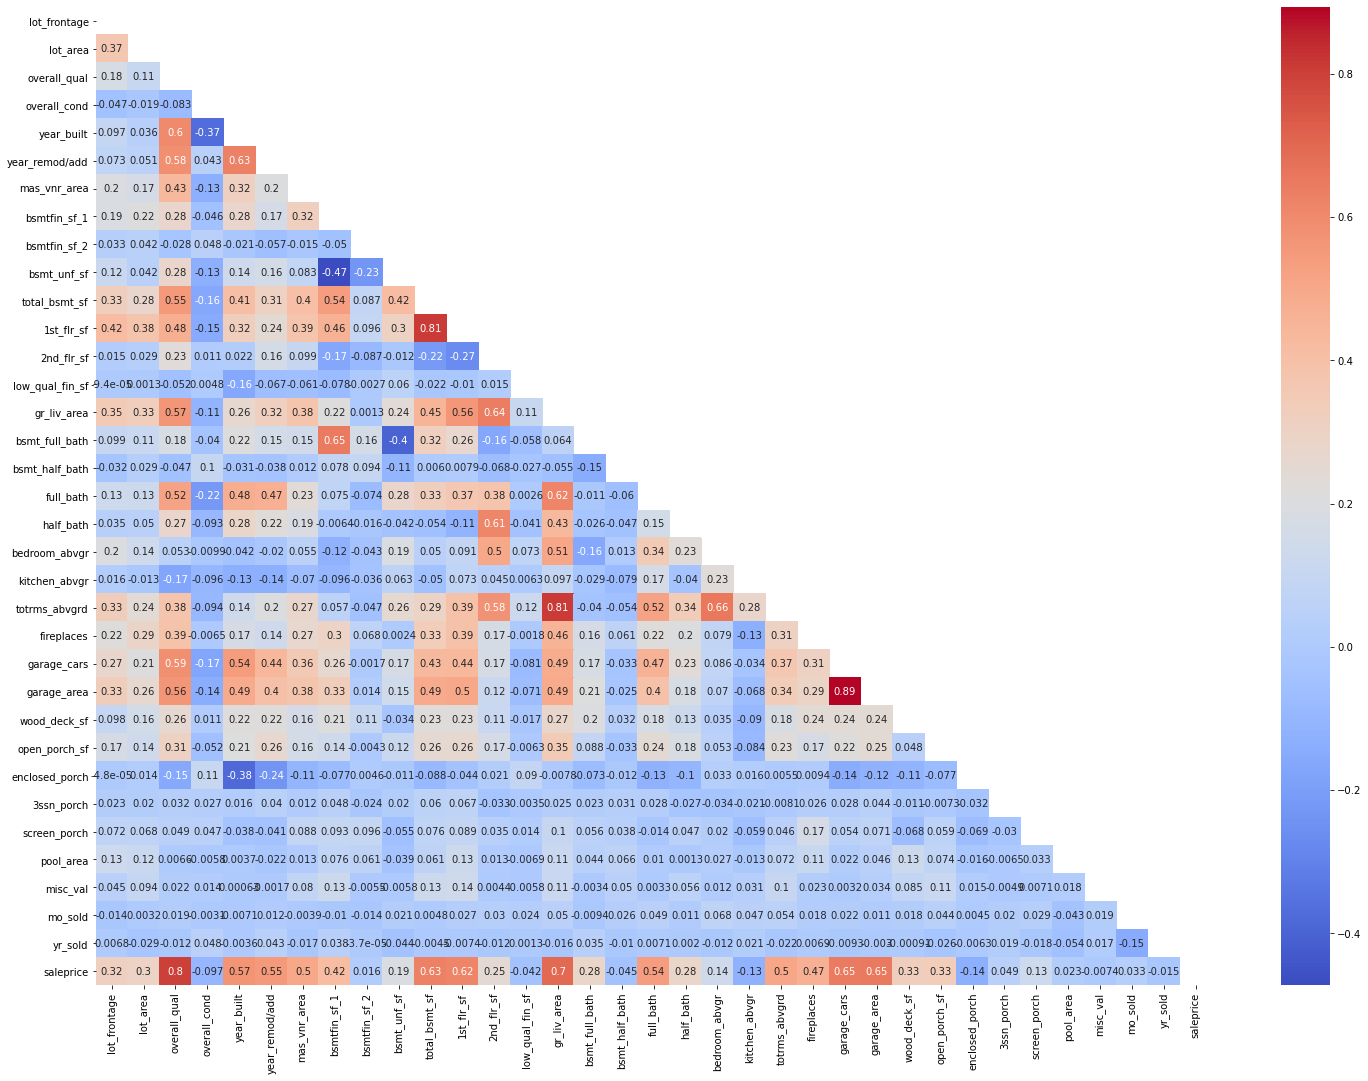

In [116]:
#Check correlation using heatmap (for numerical data)
plt.figure(figsize=(25,18))
sns.heatmap(train_num.corr(),annot=True,mask=np.triu(train_num.corr()), cmap='coolwarm');

In [117]:
#function to create subplots
def subplots(df, list_of_columns, kind='bar',type_of='cat'):
    fig, ax = plt.subplots(nrows=8, ncols=5, figsize=(20,30)) 
    ax = ax.ravel() #ravel() functions returns contiguous flattened array(1D array with all the input-array elements and with the same type as it)
    for i, column in enumerate(list_of_columns): 
        if (kind == 'scatter') & (type_of == 'num'):
            df.plot(y='saleprice', x=column, kind=kind, ax=ax[i])
        elif (kind == 'box') & (type_of == 'cat'):
            sns.boxplot(x=column,y='saleprice',data=train, ax=ax[i])
        elif type_of == 'num':
            df[column].plot(kind=kind, ax=ax[i])
        else:
            df[column].value_counts().plot(kind=kind, ax=ax[i])
        for i, column in enumerate(list_of_columns):
            ax[i].set_title(column, fontsize=14)        
        plt.subplots_adjust(hspace=1.0,wspace=0.8) 

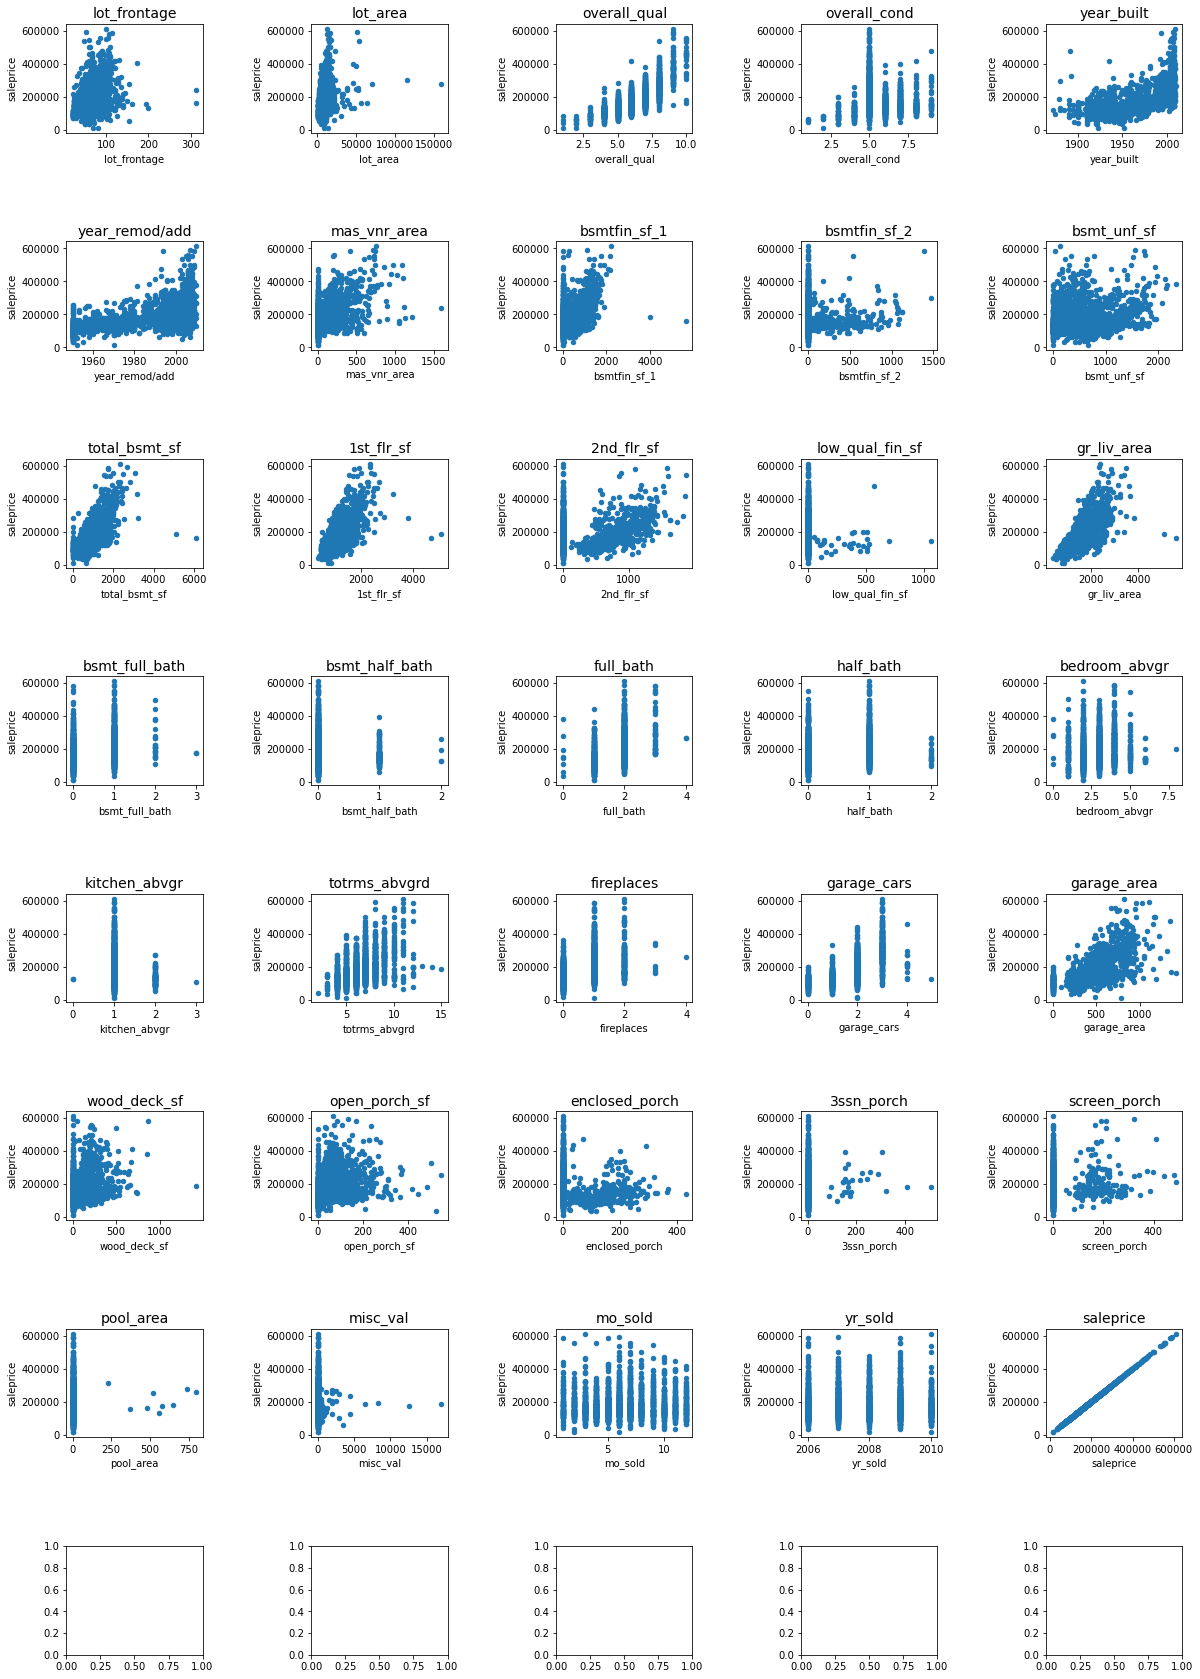

In [118]:
#Plot for numerical data
subplots(train_num,list_num,kind='scatter', type_of='num');

Outliers:
mas_vnr_area: one above 1500

bsmtfin_sf_1: 2 above 4000

bsmtfin_sf_2: 2 above 1200

total_bsmt_sf: 2 above 4000

1st_flr_sf: 2 above 4000

gr_liv_area: 2 above 4000

3ssn_porch: 2 above 400

misc_valL 2 above 10k


In [119]:
#mas_vnr_area: one above 1500
train[(train['mas_vnr_area'] > 1500)]

,id,ms_subclass,ms_zoning,lot_frontage,lot_area,street,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold,sale_type,saleprice
1409,1850,60,FV,66.0,7399,Pave,IR1,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,2Story,7,5,1997,1998,Hip,CompShg,VinylSd,VinylSd,BrkFace,1600.0,Gd,TA,PConc,Gd,TA,No,BLQ,649.0,Unf,0.0,326.0,975.0,GasA,Ex,Y,SBrkr,975,975,0,1950,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Detchd,1997,RFn,2.0,576.0,TA,TA,Y,0,10,0,0,198,0,0,6,2007,WD,239000


In [120]:
#Drop and check
train.drop(train[train['mas_vnr_area'] > 1500].index, inplace = True)
train[(train['mas_vnr_area'] > 1500)]

,id,ms_subclass,ms_zoning,lot_frontage,lot_area,street,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold,sale_type,saleprice


In [121]:
#bsmtfin_sf_1: 2 above 4000
train[(train['bsmtfin_sf_1'] > 4000)]

,id,ms_subclass,ms_zoning,lot_frontage,lot_area,street,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold,sale_type,saleprice
960,1499,60,RL,313.0,63887,Pave,IR3,Bnk,AllPub,Corner,Gtl,Edwards,Feedr,Norm,1Fam,2Story,10,5,2008,2008,Hip,ClyTile,Stucco,Stucco,Stone,796.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,5644.0,Unf,0.0,466.0,6110.0,GasA,Ex,Y,SBrkr,4692,950,0,5642,2.0,0.0,2,1,3,1,Ex,12,Typ,3,Attchd,2008,Fin,2.0,1418.0,TA,TA,Y,214,292,0,0,0,480,0,1,2008,New,160000
1885,2181,20,RL,128.0,39290,Pave,IR1,Bnk,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,10,5,2008,2009,Hip,CompShg,CemntBd,CmentBd,Stone,1224.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,4010.0,Unf,0.0,1085.0,5095.0,GasA,Ex,Y,SBrkr,5095,0,0,5095,1.0,1.0,2,1,2,1,Ex,15,Typ,2,Attchd,2008,Fin,3.0,1154.0,TA,TA,Y,546,484,0,0,0,0,17000,10,2007,New,183850


In [122]:
#Drop and check
train.drop(train[train['bsmtfin_sf_1'] > 4000].index, inplace = True)
train[(train['bsmtfin_sf_1'] > 4000)]

,id,ms_subclass,ms_zoning,lot_frontage,lot_area,street,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold,sale_type,saleprice


In [123]:
#bsmtfin_sf_2: 2 above 1200
train[(train['bsmtfin_sf_2'] > 1200)]

,id,ms_subclass,ms_zoning,lot_frontage,lot_area,street,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold,sale_type,saleprice
770,2093,60,RL,86.0,10380,Pave,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1986,1987,Gable,CompShg,Plywood,Plywood,BrkFace,172.0,Gd,TA,CBlock,TA,TA,Gd,LwQ,28.0,ALQ,1474.0,0.0,1502.0,GasA,Ex,Y,SBrkr,1553,1177,0,2730,1.0,0.0,2,1,4,1,Gd,8,Typ,1,Attchd,1987,Fin,2.0,576.0,TA,TA,Y,201,96,0,0,0,0,0,8,2007,WD,301000
1692,2451,60,RL,114.0,17242,Pave,IR1,Lvl,AllPub,Inside,Gtl,NoRidge,Norm,Norm,1Fam,2Story,9,5,1993,1994,Hip,CompShg,MetalSd,MetalSd,BrkFace,738.0,Gd,Gd,PConc,Ex,TA,Gd,Rec,292.0,GLQ,1393.0,48.0,1733.0,GasA,Ex,Y,SBrkr,1933,1567,0,3500,1.0,0.0,3,1,4,1,Ex,11,Typ,1,Attchd,1993,RFn,3.0,959.0,TA,TA,Y,870,86,0,0,210,0,0,5,2006,WD,584500


In [124]:
#Drop and check
train.drop(train[train['bsmtfin_sf_2'] > 1200].index, inplace = True)
train[(train['bsmtfin_sf_2'] > 1200)]

,id,ms_subclass,ms_zoning,lot_frontage,lot_area,street,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold,sale_type,saleprice


In [125]:
#total_bsmt_sf: 2 above 4000
train[(train['total_bsmt_sf'] > 4000)]

,id,ms_subclass,ms_zoning,lot_frontage,lot_area,street,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold,sale_type,saleprice


In [126]:
#1st_flr_sf: 2 above 4000
train[(train['1st_flr_sf'] > 4000)]

,id,ms_subclass,ms_zoning,lot_frontage,lot_area,street,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold,sale_type,saleprice


In [127]:
#gr_liv_area: 2 above 4000
train[(train['gr_liv_area'] > 4000)]

,id,ms_subclass,ms_zoning,lot_frontage,lot_area,street,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold,sale_type,saleprice


In [128]:
#3ssn_porch: 2 above 400
train[(train['3ssn_porch'] > 400)]

,id,ms_subclass,ms_zoning,lot_frontage,lot_area,street,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold,sale_type,saleprice
892,1209,20,RL,100.0,10175,Pave,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1964,1964,Gable,CompShg,HdBoard,Plywood,BrkFace,272.0,TA,TA,CBlock,TA,TA,No,BLQ,490.0,Unf,0.0,935.0,1425.0,GasA,Gd,Y,SBrkr,1425,0,0,1425,0.0,0.0,2,0,3,1,TA,7,Typ,1,Attchd,1964,RFn,2.0,576.0,TA,TA,Y,0,0,0,407,0,0,0,7,2008,WD,180500
1219,365,20,RL,99.0,11851,Pave,Reg,Lvl,AllPub,Corner,Gtl,Gilbert,Norm,Norm,1Fam,1Story,7,5,1990,1990,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,1424.0,1424.0,GasA,Ex,Y,SBrkr,1442,0,0,1442,0.0,0.0,2,0,3,1,TA,5,Typ,0,Attchd,1990,RFn,2.0,500.0,TA,TA,Y,0,34,0,508,0,0,0,5,2009,WD,180500


In [129]:
#Drop and check
train.drop(train[train['3ssn_porch'] > 400].index, inplace = True)
train[(train['3ssn_porch'] > 400)]

,id,ms_subclass,ms_zoning,lot_frontage,lot_area,street,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold,sale_type,saleprice


In [130]:
#misc_val: 2 above 10k
train[(train['misc_val'] > 10000)]

,id,ms_subclass,ms_zoning,lot_frontage,lot_area,street,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold,sale_type,saleprice
304,3,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,Attchd,1958,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,12500,6,2010,WD,172000


In [131]:
#Drop and check
train.drop(train[train['misc_val'] > 10000].index, inplace = True)
train[(train['misc_val'] > 10000)]

,id,ms_subclass,ms_zoning,lot_frontage,lot_area,street,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold,sale_type,saleprice


In [132]:
train.columns

Index(['id', 'ms_subclass', 'ms_zoning', 'lot_frontage', 'lot_area', 'street',
       'lot_shape', 'land_contour', 'utilities', 'lot_config', 'land_slope',
       'neighborhood', 'condition_1', 'condition_2', 'bldg_type',
       'house_style', 'overall_qual', 'overall_cond', 'year_built',
       'year_remod/add', 'roof_style', 'roof_matl', 'exterior_1st',
       'exterior_2nd', 'mas_vnr_type', 'mas_vnr_area', 'exter_qual',
       'exter_cond', 'foundation', 'bsmt_qual', 'bsmt_cond', 'bsmt_exposure',
       'bsmtfin_type_1', 'bsmtfin_sf_1', 'bsmtfin_type_2', 'bsmtfin_sf_2',
       'bsmt_unf_sf', 'total_bsmt_sf', 'heating', 'heating_qc', 'central_air',
       'electrical', '1st_flr_sf', '2nd_flr_sf', 'low_qual_fin_sf',
       'gr_liv_area', 'bsmt_full_bath', 'bsmt_half_bath', 'full_bath',
       'half_bath', 'bedroom_abvgr', 'kitchen_abvgr', 'kitchen_qual',
       'totrms_abvgrd', 'functional', 'fireplaces', 'garage_type',
       'garage_yr_blt', 'garage_finish', 'garage_cars', 'garage_a

In [133]:
train.shape

(2043, 75)

Pick out features that are highly correlated with each other (benchmark as > 0.8). Drop one of them to avoid multi collinearity.

1. 'yr_sold' and 'id': drop 'yr_sold' as 'id' has higher correlation with 'saleprice'
2. '1st_flr_sf' and 'total_bsmt_sf': drop '1st_flr_sf' as 'total_bsmt_sf' has higher correlation with 'saleprice'
3. 'totrms_abvgrd' and 'gr_liv_area': drop 'totrms_abvgrd' as 'gr_liv_area' has higher correlation with 'saleprice'
4. 'garage_area' and 'garage_cars': drop 'garage_cars' as 'garage_area' has higher correlation with 'saleprice'

Note: also drop pid - it acts as an unique identifier (similar to id)

columns to drop = ['yr_sold', '1st_flr_sf', 'totrms_abvgrd', 'garage_cars', 'pid']


In [134]:
num_col_to_drop = ['yr_sold', '1st_flr_sf', 'totrms_abvgrd', 'garage_cars']

#Drop columns from train and test
train = train.drop(num_col_to_drop, axis=1)
test = test.drop(num_col_to_drop, axis=1)

#Drop from train_num too
train_num = train_num.drop(num_col_to_drop, axis=1)
list_num = list(train_num)

In [135]:
#Check the shape of train 
train.shape, train_num.shape
#confirmed that 5 columns are dropped

((2043, 71), (2051, 31))

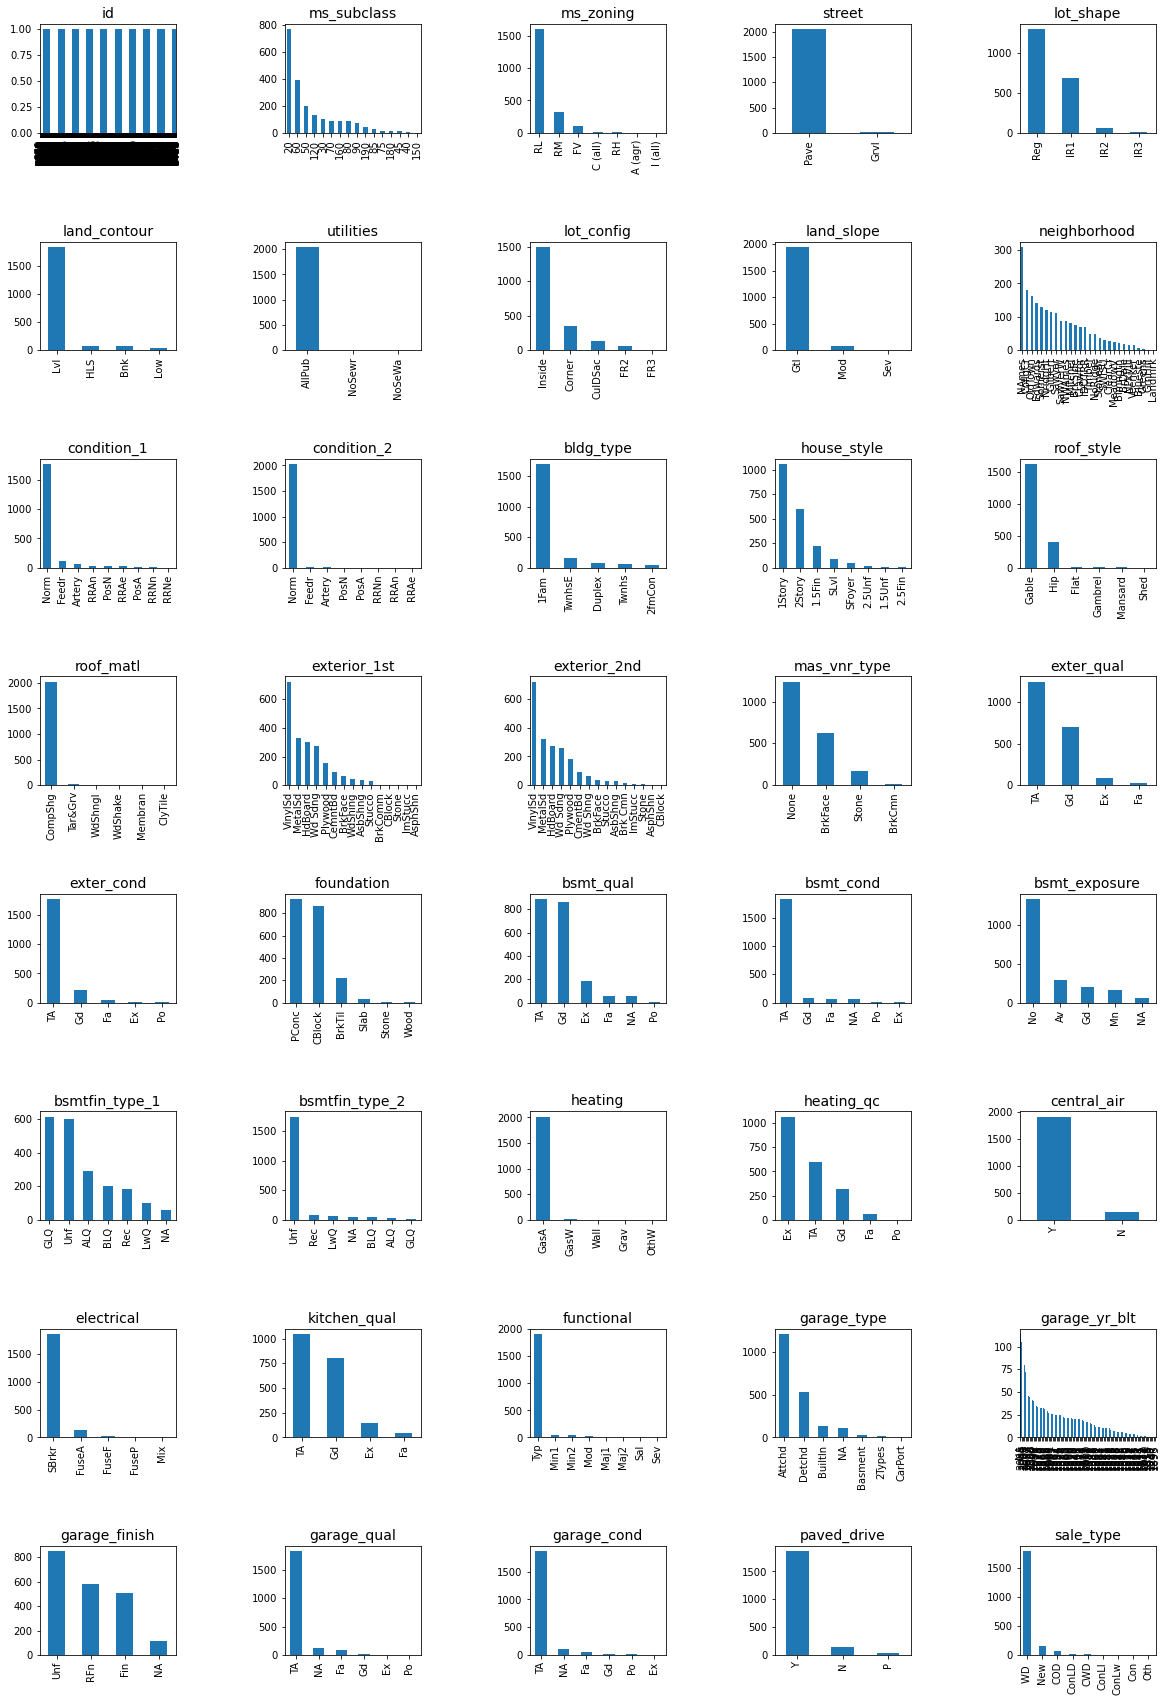

In [136]:
#Plot categorical data
#Look at distribution of categorical data in their own category
subplots(train_cat,list_cat);

In [137]:
#From categorical data, split into Ordinal/Nominal

train_cat_ordinal = ['lot_shape','utilities','land_slope','exter_qual',
       'exter_cond','bsmt_qual', 'bsmt_cond', 'bsmt_exposure',
       'bsmtfin_type_1', 'bsmtfin_type_2','heating_qc','electrical','kitchen_qual', 'functional']

train_cat_nominal = ['ms_zoning', 'street','land_contour','lot_config','neighborhood', 'condition_1',
       'condition_2', 'bldg_type', 'house_style','roof_style', 'roof_matl',
       'exterior_1st', 'exterior_2nd', 'mas_vnr_type', 'foundation','heating','central_air','garage_type','garage_yr_blt','garage_finish', 'garage_qual',
       'garage_cond', 'paved_drive','sale_type']



In [138]:
#For ordinal data, change from categories to numerical

train["lot_shape"].replace({"IR3": 1, "IR2":2, "IR1":3, "Reg":4}, inplace = True)
train["utilities"].replace({"AllPub": 4, "NoSewr":3, "NoSeWa":2, "ELO":1}, inplace = True)
train["land_slope"].replace({"Sev": 3, "Mod":2, "Gtl":1}, inplace = True)
train["exter_qual"].replace({"Ex": 5, "Gd":4, "TA":3, "Fa":2, "Po":1}, inplace = True)
train["exter_cond"].replace({"Ex": 5, "Gd":4, "TA":3, "Fa":2, "Po":1}, inplace = True)
train["bsmt_qual"].replace({"Ex": 5, "Gd":4, "TA":3, "Fa":2, "Po":1, "NA":0}, inplace = True)
train["bsmt_cond"].replace({"Ex": 5, "Gd":4, "TA":3, "Fa":2, "Po":1, "NA":0}, inplace = True)
train['bsmt_exposure'].replace({"Gd": 4, "Av":3, "Mn":2, "No":1, "NA":0}, inplace = True)
train["bsmtfin_type_1"].replace({"GLQ": 6, "ALQ": 5, "BLQ": 4, "Rec":3, "LwQ":2, "Unf":1, "NA":0}, inplace = True)
train["bsmtfin_type_2"].replace({"GLQ": 6, "ALQ": 5, "BLQ": 4, "Rec":3, "LwQ":2, "Unf":1, "NA":0}, inplace = True)
train["heating_qc"].replace({"Ex": 5, "Gd":4, "TA":3, "Fa":2, "Po":1}, inplace = True)
train["electrical"].replace({"SBrkr": 5, "FuseA":4, "FuseF":3, "FuseP":2, "Mix":1}, inplace = True)
train["kitchen_qual"].replace({"Ex": 5, "Gd":4, "TA":3, "Fa":2, "Po":1}, inplace = True)
train["functional"].replace({"Typ": 8, "Min1": 7, "Min2": 6, "Mod":5, "Maj1":4, "Maj2":3, "Sev": 2, "Sal":1}, inplace = True)

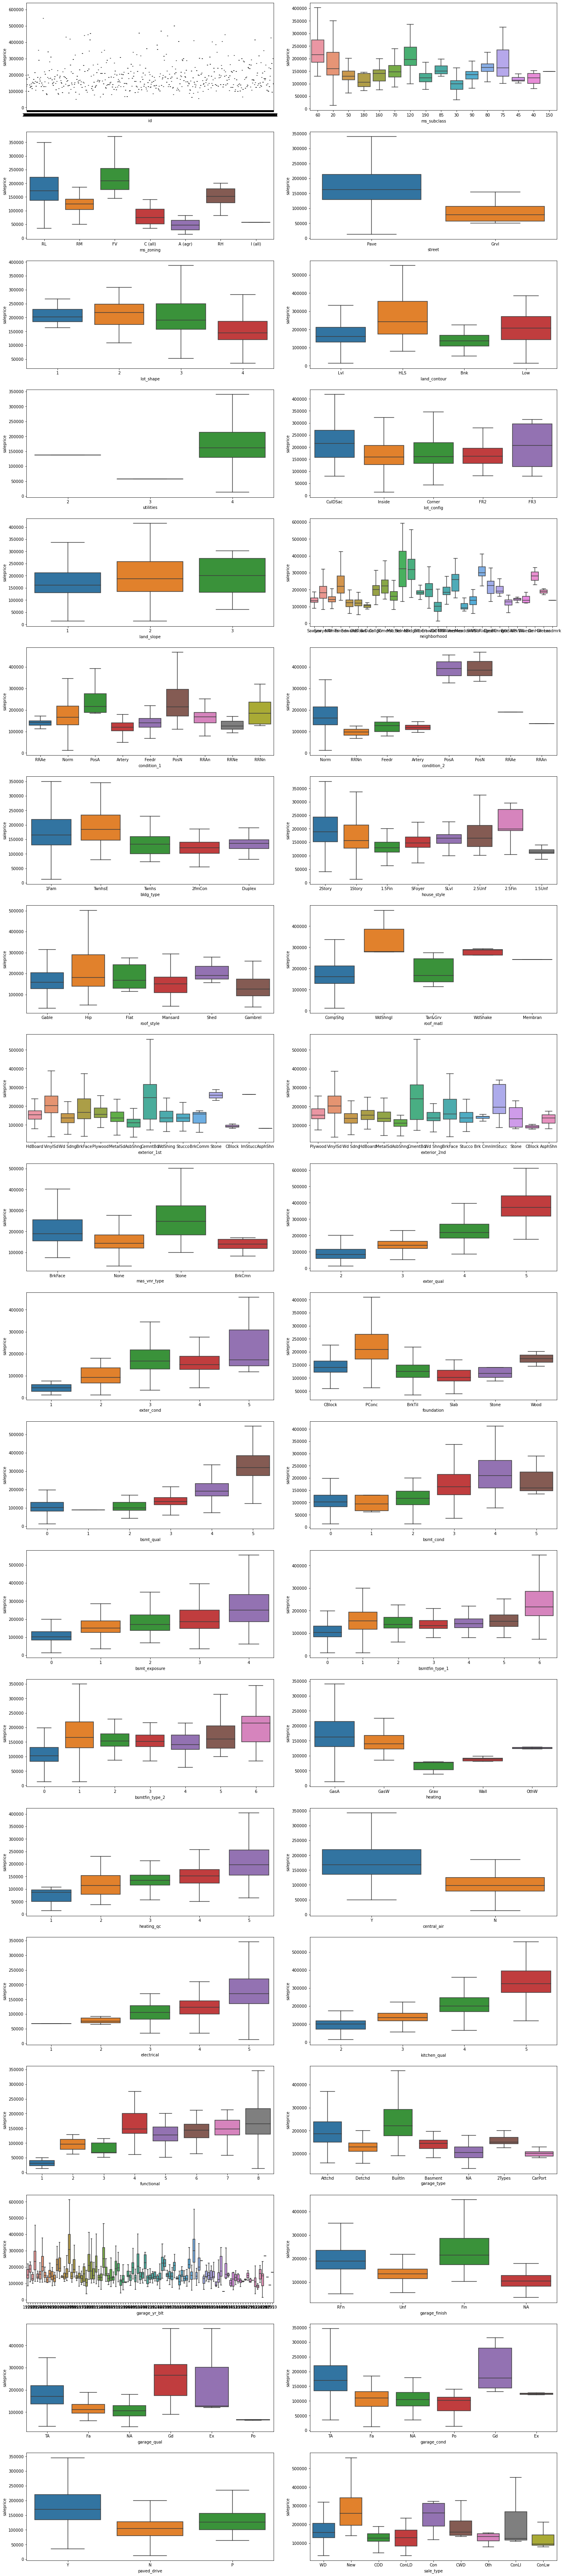

In [139]:
#Plot categorical data against Sale Price; boxplots
#do the plotting after change ordinal to numerical, it helps to understand the trends

#For a quick view
fig, ax = plt.subplots(nrows=20, ncols=2, figsize=(20,90)) 
#fig, ax = plt.subplots(nrows=14, ncols=3, figsize=(12,30)) 

ax = ax.ravel() 
for i, column in enumerate(list_cat): 
    sns.boxplot(x=column,y='saleprice',data=train, ax=ax[i], showfliers=False)

fig.tight_layout(pad=2)

Observations:
- ms_subclass: 60 and 120 have higher saleprice
- ms_zoning: Floating Village Residential has higher saleprice
- street: paved has higher sale price
- lot_shape: the more regular, the higher the saleprice
- land_contour: hillside has higher saleprice
- land_slope: severe slope has higher saleprice
- roof_matl: Wood Shingles have higher saleprice
- basement factors affect price (generally, better quality, better price)
- new house sell for higher price


In [140]:
#For nominal data, dummify data
train_dummified = pd.get_dummies(train, columns=train_cat_nominal, drop_first=True)

In [141]:
train.shape, train_dummified.shape

((2043, 71), (2043, 293))

In [142]:
#Check the correlation with dummified data
correlation_with_saleprice_dummified = pd.DataFrame(train_dummified.corr()).sort_values(by='saleprice', ascending=False).head(1).T.sort_values(by='saleprice', ascending=False)
correlation_with_saleprice_dummified

,saleprice
saleprice,1.000000
overall_qual,0.804415
exter_qual,0.717194
gr_liv_area,0.716292
kitchen_qual,0.694173
total_bsmt_sf,0.666080
garage_area,0.654520
bsmt_qual,0.605453
year_built,0.574299
year_remod/add,0.553624


In [143]:
#identify those with Correlation > 0.5
correlation_with_saleprice_dummified_strong = correlation_with_saleprice_dummified.loc[correlation_with_saleprice_dummified['saleprice']>0.5,:]
correlation_with_saleprice_dummified_strong

,saleprice
saleprice,1.000000
overall_qual,0.804415
exter_qual,0.717194
gr_liv_area,0.716292
kitchen_qual,0.694173
total_bsmt_sf,0.666080
garage_area,0.654520
bsmt_qual,0.605453
year_built,0.574299
year_remod/add,0.553624


In [145]:
#save the file as train.csv
os.chdir("C:/Users/annitan/Desktop/GA/DSIF-SG-7 - Copy/Project_2/data")
train.to_csv('train.csv')

os.chdir("C:/Users/annitan/Desktop/GA/DSIF-SG-7 - Copy/Project_2/data")
train_dummified.to_csv('train_dummified.csv')

#save the file as test.csv
os.chdir("C:/Users/annitan/Desktop/GA/DSIF-SG-7 - Copy/Project_2/data")
test.to_csv('test.csv')